# **Supervised Learning - Online Shoppers Purchasing Intention**
##### *Artificial Intelligence - Assignment No. 2*

#### Notebook by **T09G94**
- Joana Santos, up202006279
- Mafalda Costa, up202006417
- Mariana Carvalho, up202007620

### **Table of Contents**

### **Introduction**
For this second IART assignment we are applying machine learning models and algorithms related to supervised learning. For our specific theme, **"Online Shoppers purchasing intention"**, we aim to predict whether an online shopper is likely to make a purchase or not, using **supervised machine learning algorithms for classification**. We will conduct an exploratory **data analysis** to determine the relevant features for our prediction task and **evaluate** various **models** to identify the most accurate and efficient one. Our goal is to provide valuable insights into customer behavior.
The input data we will use to make predictions and identify patterns consists in a data set of
**17 features** of various types and **one target**, the **Revenue**, which indicates if a person made a buy or not. Seven of the features in the dataset are categorical, which require further pre processing

### **Required libraries**
- NumPy
- Pandas
- Matplotlib
- Seaborn
- scikit-learn
- nbformat
- plotly

### **Metrics and Models and Frameworks**
#### Metrics
- Confusion matrix
- Performance during learning
- Precision
- Recall
- Accuracu
- F1 measure
- Time spent to train/test the models

#### Models and Frameworks
- Decision Tree
- k-nearest neighbours
- Random Forest
- Support Vector Machines (SVM)
- eXtreme Gradient Boosting
- Neural network
- Naive Bayes

### Attributes
The dataset consists of 10 numerical and 8 categorical attributes.
- **Administrative**: count of pages visited by the visitor (e.g. user details and account)
- **Administrative_Duration**: total time spent (seconds) in on Administrative type of page
- **Informational**: count of pages visited by the visitor (e.g. about and contact of the website)
- **Informational_Duration**: total time spent (seconds) in on Informational type of page
- **ProductRelated**: count of pages visited by the visitor (e.g. product details)
- **ProductRelated_Duration**: total time spent (seconds) in on ProductRelated type of page
- **BounceRates**: percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server
- **ExitRates**: the percentage of visitors to a page on the website from which they exit the website to a different website
- **PageValues**: the average value for a page that a user visited before landing on the goal page
- **SpecialDay**: indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day)
- **Month**: the month of the visit to the website
- **OperatingSystems**: the type of operation system used by the visitor
- **Browser**: the type of browser used by the visitor
- **Region**: the geographic region from which the session started
- **TrafficType**: describes how traffic arrived on the website (Direct, Organic, Referral, Social, Email, Display and Paid)
- **VisitorType**: returning or new visitor or other
- **Weekend**: indicating whether the date of the visit is weekend
- **Revenue**: indicates whether the visitor made a purchase or not

In [5]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn.tree as tree
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, RepeatedKFold, RepeatedStratifiedKFold

Dataset analysis to check for the need for data pre-processing.

In [9]:
data = pd.read_csv("dataset/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [11]:
for i in data.select_dtypes(include=['object','bool']).columns:
    sb.countplot(i,data=data)
    plt.title(i)
    plt.show()

TypeError: countplot() got multiple values for argument 'data'

The data is free of NULL values

In [ ]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Removing duplicate rows.

In [ ]:
print("Total number of duplicate rows: ", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Total number of duplicate rows: ", data.duplicated().sum())

Total number of duplicate rows:  125
Total number of duplicate rows:  0


In [ ]:
target="Revenue"
categorical_features=["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month"]

Encoding the categorical feautures. Now we have 76 attributes, so the 8 categorical feautures turned into 66.

In [ ]:
encoder = OneHotEncoder()
for feature in categorical_features:
    onehotarray = encoder.fit_transform(data[[feature]]).toarray()
    items = [f'{feature}_{item}' for item in encoder.categories_[0]]
    data[items] = onehotarray
data=data.drop(categorical_features, axis=1)
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#sb.pairplot(data, hue='Revenue', height=4)

Removing the categorical features from the data and the target from the features.

In [ ]:

features=list(data.columns)
features.remove(target)
features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems_1',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_5',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'OperatingSystems_8',
 'Browser_1',
 'Browser_2',
 'Browser_3',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_7',
 'Browser_8',
 'Browser_9',
 'Browser_10',
 'Browser_11',
 'Browser_12',
 'Browser_13',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_5',
 'Region_6',
 'Region_7',
 'Region_8',
 'Region_9',
 'TrafficType_1',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_6',
 'TrafficType_7',
 'TrafficType_8',
 'TrafficType_9',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_12',
 'TrafficType_13',
 'TrafficType_14',
 'TrafficType_15',
 'TrafficType_16',
 'TrafficType_17',


In [ ]:
# We can extract the data in this format from pandas like this:
all_inputs = data[features].values

# Similarly, we can extract the class labels
all_labels = data[target].values





In [ ]:
def trainingAndPredictions(Algorithm, name):
    X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.25)
    Algorithm.fit(X_train, y_train)
    y_pred = Algorithm.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    df = pd.DataFrame({"Model"           : [name],
                        "Accuracy_score"  : [accuracy],
                        "Recall_score"    : [recall],
                        "Precision"       : [precision],
                        "f1_score"        : [f1],
                        })
    conf_matrix = confusion_matrix(y_test, y_pred)
    sb.heatmap(conf_matrix, cmap='Blues', annot=True, xticklabels=data['Revenue'].unique(), yticklabels=data['Revenue'].unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return df
    
def trainingAndPredictionsWithKFold(Algorithm, name):
    kf = KFold(n_splits=10)
    predictions = []
    model_accuracies = []
    
    for i, (train_index, test_index) in enumerate(kf.split(all_inputs, all_labels)):
        # Split the data into training and testing sets
        X_train, X_test = all_inputs[train_index], all_inputs[test_index]
        y_train, y_test = all_labels[train_index], all_labels[test_index]
        Algorithm.fit(X_train, y_train)
        predictions.append(Algorithm.predict(X_test))
        accuracy_temp = Algorithm.score(X_test, y_test)
        model_accuracies.append(accuracy_temp)
        
    all_predictions = np.concatenate(predictions)
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recall],
                       "Precision"       : [precision],
                       "f1_score"        : [f1],
                      })
    conf_matrix = confusion_matrix(all_labels, all_predictions)
    sb.heatmap(conf_matrix, cmap='Blues', annot=True, xticklabels=data['Revenue'].unique(), yticklabels=data['Revenue'].unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    plt.hist(model_accuracies)
    return df

    
def trainingRepetitions(Algorithm, name):
    model_accuracies = []
    predictions = []
    for repetition in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=repetition)
        Algorithm.fit(X_train, y_train)
        accuracy = Algorithm.score(X_test, y_test)
        model_accuracies.append(accuracy)
        predictions.append(Algorithm.predict(X_test))
        
    plt.hist(model_accuracies)



    

### DECISION TREE

Firstly we will try to find the best parameters for the Decision Tree Classifier using GridSearchCV

In [ ]:
'''decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5], 
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_features': [None, 'sqrt', 'log2', 2, 4], 
    'random_state': [None, 2, 42, 100],
      }


cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier'''

#Best score: 0.8989620842899531
#Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


"decision_tree_classifier = DecisionTreeClassifier()\n\nparameter_grid = {\n    'criterion': ['gini', 'entropy'],\n    'splitter': ['best', 'random'],\n    'max_depth': [3, 4, 5, 6],\n    'min_samples_leaf': [1, 2, 3, 4, 5], \n    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],\n    'max_features': [None, 'sqrt', 'log2', 2, 4], \n    'random_state': [None, 2, 42, 100],\n      }\n\n\ncross_validation = KFold(n_splits=10)\n\ngrid_search = GridSearchCV( decision_tree_classifier,\n                           param_grid=parameter_grid,\n                           cv=cross_validation)\n\ngrid_search.fit(all_inputs, all_labels)\n\nprint('Best score: {}'.format(grid_search.best_score_))\nprint('Best parameters: {}'.format(grid_search.best_params_))\n\ndecision_tree_classifier = grid_search.best_estimator_\ndecision_tree_classifier"

Then we can teach the algorithm using the best parameters and using kFold cross validation to check the accuracy of the model

Then we can plot the confusion matrix and the ROC curve to check the performance of the model

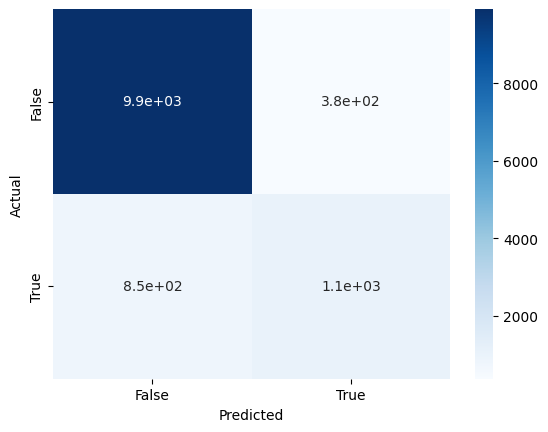

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,Decision Tree,0.898976,0.552935,0.735192,0.63117


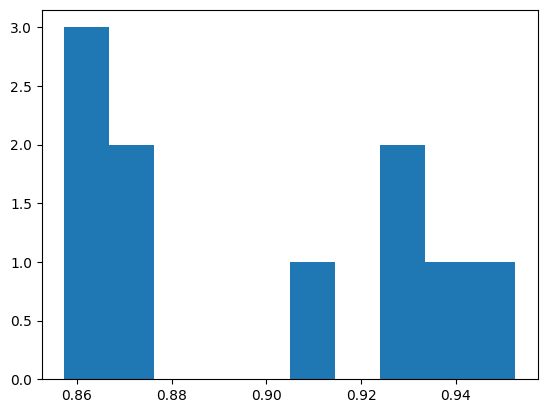

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='best')
model_DT_Kfold=trainingAndPredictionsWithKFold(decision_tree_classifier, "Decision Tree")
model_DT_Kfold


In [ ]:
with open('dtc_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)
    
from subprocess import check_call
check_call(['dot','-Tpng','dtc_tree.dot','-o','dtc_tree.png'])

FileNotFoundError: [WinError 2] O sistema não conseguiu localizar o ficheiro especificado

<img src="dtc_tree.png"/>

### RANDOM FOREST

Firstly we will try to find the best parameters for the random florest using GridSearchCV

In [ ]:
random_forest_classifier = RandomForestClassifier()

parameter_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 3], 
    'min_samples_split': [2, 3, 4],
    'max_leaf_nodes': [None, 2, 4, 6, 8],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'n_jobs': [None, 1, 2, 3],
    'warm_start': [True, False],
    'ccp_alpha': [0.0, 0.1, 0.2],
    'max_samples': [None, 2, 4, 6],
}

     
cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


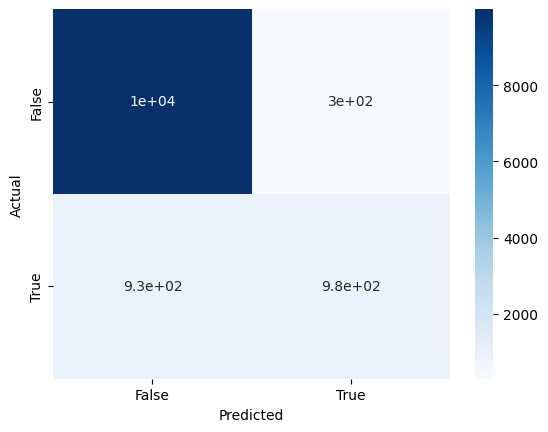

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,Random Forest,0.899304,0.514675,0.764202,0.615096


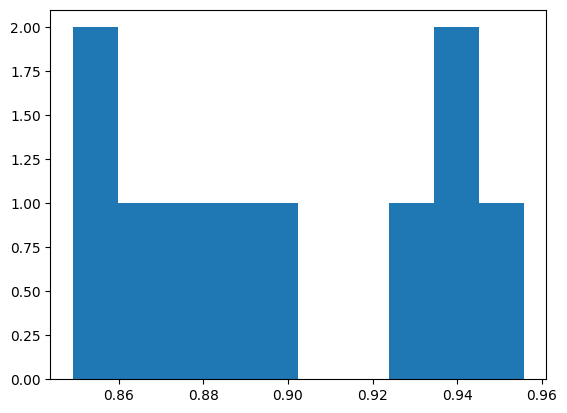

In [ ]:
random_florest_classifier = RandomForestClassifier(n_estimators=50, max_depth=None, max_features='sqrt')
model_RF_Kfold=trainingAndPredictionsWithKFold(random_forest_classifier, "Random Forest")
model_RF_Kfold

### KNN

Firstly we will try to find the best parameters for the KNN using GridSearchCV

In [ ]:
knn = KNeighborsClassifier()

parameter_grid = {'n_neighbors': [5, 6, 7, 8, 9, 10,12, 14, 15,16, 20], 
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'n_jobs': [None, 1, 2, 3],
                  'leaf_size': [10, 20, 30, 40, 50],
                  'p': [1, 2, 3, 4, 5],
                  'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
                  'metric_params': [None, 1, 2, 3, 4, 5],
                  }


cross_validation = KFold(n_splits=10)

grid_search = GridSearchCV( knn,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

knn_classifier = grid_search.best_estimator_
knn_classifier


Best score: 0.8656931297914905
Best parameters: {'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'uniform'}


KNeighborsClassifier(n_neighbors=14)

Then we can teach the algorithm using the best parameters and using kFold cross validation to check the accuracy of the model

Then we can plot the confusion matrix and the ROC curve to check the performance of the model

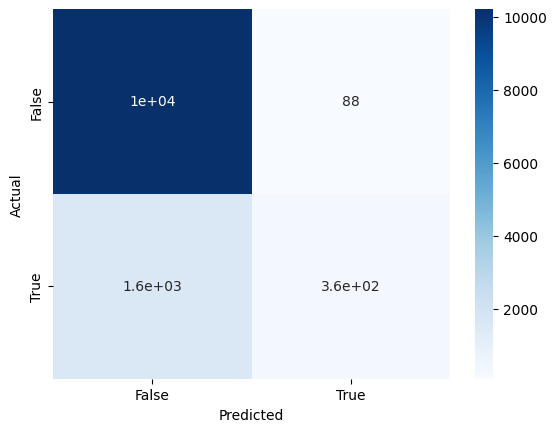

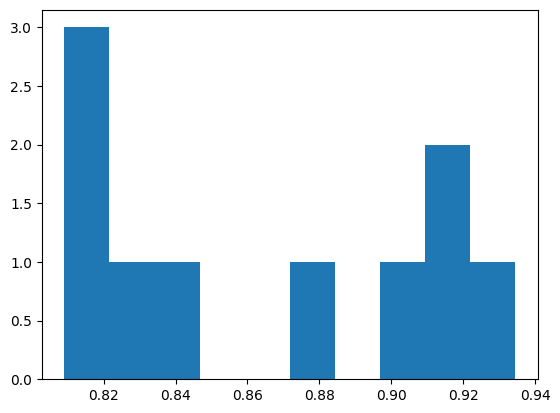

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=14)
model_KNN_Kfold=trainingAndPredictionsWithKFold(knn_classifier, "KNN")

In [ ]:
model_performances = pd.concat([model_DT_Kfold, model_RF_Kfold, model_KNN_Kfold],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,Decision Tree,0.898976,0.552935,0.735192,0.631170
1,Random Forest,0.899304,0.514675,0.764202,0.615096
2,KNN,0.865711,0.187107,0.802247,0.303442
